# Loan Data From Prosper
## by *Olajuwon Abdulbasit Olasubomi*

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling, Assessing, Cleaning</a></li>
<li><a href="#univariate">Univariate Exploration</a></li>
<li><a href="#bivariate">Bivariate Exploration</a></li>
<li><a href="#multivariate">Multivariate Exploration</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

After some data preparation and cleaning, I will use EDA and various charts to examine the links between and among the variables in an effort to provide meaningful research findings.

<a id = 'wrangling'></a>
## Data Wrangling, Assessing, & Cleaning

### Data Wrangling

In [245]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', None)
%matplotlib inline

In [246]:
# Loading the datasets and assessing.
loan = pd.read_csv("prosperLoanData.csv")
loan.head()

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   

   BorrowerRate  LenderYield  EstimatedEffectiveYield  EstimatedLoss  \
0        0.1580       0.1380                      NaN            NaN   
1        0.0920       0.0820                  0.07960         0.0249   
2        0.2750       0.2400                      NaN            NaN   
3        0.0974       0.0874                  0.08490         0.0249   
4        0.2085       0.1985                  0.18316         0.0925   

   EstimatedReturn  ProsperRating (numeric) ProsperRating (Alpha)  \
0              NaN                      NaN                   NaN   
1          0.05470                      6.0                     A   
2              NaN                      NaN                   NaN   
3          0.06000                      6.0                     A   
4          0.09066                      3.0                     D   

   ProsperScore  ListingCategory (numeric) BorrowerState     Occupation  \
0           NaN                          0            CO          Other   
1           7.0                          2            CO   Professional   
2           NaN                          0            GA          Other   
3           9.0                         16            GA  Skilled Labor   
4           4.0                          2            MN      Executive   

  EmploymentStatus  EmploymentStatusDuration  IsBorrowerHomeowner  \
0    Self-employed                       2.0                 True   
1         Employed                      44.0                False   
2    Not available                       NaN                False   
3         Employed                     113.0                 True   
4         Employed                      44.0                 True   

   CurrentlyInGroup                 GroupKey               DateCreditPulled  \
0              True                      NaN  2007-08-26 18:41:46.780000000   
1             False                      NaN            2014-02-27 08:28:14   
2              True  783C3371218786870A73D20  2007-01-02 14:09:10.060000000   
3             False                      NaN            2012-10-22 11:02:32   
4             False                      NaN            2013-09-14 18:38:44   

   CreditScoreRangeLower  CreditScoreRangeUpper FirstRecordedCreditLine  \
0                  640.0                  659.0     2001-10-11 00:00:00   
1                  680.0                  699.0     1996-03-18 00:00:00   
2                  480.0                  499.0     2002-07-27 00:00:00   
3                  800.0                  819.0     1983-02-28 00:00:00   
4                  680.0                  699.0     2004-02-20 00:00:00   

   CurrentCreditLines  OpenCreditLines  TotalCreditLinespast7years  \
0                 5.0              4.0                        12.0   
1                14.0             14.0                        29.0   
2                 NaN              NaN                         3.0   
3                 5.0              5.0                        29.0   
4                19.0             19.0                        49.0   

   OpenRevolvingAccounts  OpenRevolvingMonthlyPayment  InquiriesLast6Months  \
0         

In [247]:
# Overview of the dataset.
print(loan.shape)
print(loan.info())

(113937, 81)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  

In [248]:
# descriptive statistics for numeric variables
print(loan.describe())

       ListingNumber           Term    BorrowerAPR   BorrowerRate  \
count   1.139370e+05  113937.000000  113912.000000  113937.000000   
mean    6.278857e+05      40.830248       0.218828       0.192764   
std     3.280762e+05      10.436212       0.080364       0.074818   
min     4.000000e+00      12.000000       0.006530       0.000000   
25%     4.009190e+05      36.000000       0.156290       0.134000   
50%     6.005540e+05      36.000000       0.209760       0.184000   
75%     8.926340e+05      36.000000       0.283810       0.250000   
max     1.255725e+06      60.000000       0.512290       0.497500   

         LenderYield  EstimatedEffectiveYield  EstimatedLoss  EstimatedReturn  \
count  113937.000000             84853.000000   84853.000000     84853.000000   
mean        0.182701                 0.168661       0.080306         0.096068   
std         0.074516                 0.068467       0.046764         0.030403   
min        -0.010000                -0.182700       0.

In [249]:
loan[loan.duplicated()]

Empty DataFrame
Columns: [ListingKey, ListingNumber, ListingCreationDate, CreditGrade, Term, LoanStatus, ClosedDate, BorrowerAPR, BorrowerRate, LenderYield, EstimatedEffectiveYield, EstimatedLoss, EstimatedReturn, ProsperRating (numeric), ProsperRating (Alpha), ProsperScore, ListingCategory (numeric), BorrowerState, Occupation, EmploymentStatus, EmploymentStatusDuration, IsBorrowerHomeowner, CurrentlyInGroup, GroupKey, DateCreditPulled, CreditScoreRangeLower, CreditScoreRangeUpper, FirstRecordedCreditLine, CurrentCreditLines, OpenCreditLines, TotalCreditLinespast7years, OpenRevolvingAccounts, OpenRevolvingMonthlyPayment, InquiriesLast6Months, TotalInquiries, CurrentDelinquencies, AmountDelinquent, DelinquenciesLast7Years, PublicRecordsLast10Years, PublicRecordsLast12Months, RevolvingCreditBalance, BankcardUtilization, AvailableBankcardCredit, TotalTrades, TradesNeverDelinquent (percentage), TradesOpenedLast6Months, DebtToIncomeRatio, IncomeRange, IncomeVerifiable, StatedMonthlyIncome, LoanKey, TotalProsperLoans, TotalProsperPaymentsBilled, OnTimeProsperPayments, ProsperPaymentsLessThanOneMonthLate, ProsperPaymentsOneMonthPlusLate, ProsperPrincipalBorrowed, ProsperPrincipalOutstanding, ScorexChangeAtTimeOfListing, LoanCurrentDaysDelinquent, LoanFirstDefaultedCycleNumber, LoanMonthsSinceOrigination, LoanNumber, LoanOriginalAmount, LoanOriginationDate, LoanOriginationQuarter, MemberKey, MonthlyLoanPayment, LP_CustomerPayments, LP_CustomerPrincipalPayments, LP_InterestandFees, LP_ServiceFees, LP_CollectionFees, LP_GrossPrincipalLoss, LP_NetPrincipalLoss, LP_NonPrincipalRecoverypayments, PercentFunded, Recommendations, InvestmentFromFriendsCount, InvestmentFromFriendsAmount, Investors]
Index: []

> We observed the presence of zero duplicated rows

#### What is the structure of your dataset?

>The dataset has 113,937 entries with 81 characteristics. We have boolean, date, boolean, categorical, and numerical variables. Factor variables with the following levels can be used to arrange variables like ProsperRating (Alpha) and IncomeRange:

>ProsperRating (Alpha): AA, A, B, C, D, E, HR (best to worth)
>
>IncomeRange: Not employed, \\$0, \\$1-\\$24,999, \\$25,000-\\$49,999, \\$50,000-\\$74,999, \\$75,000-\\$99,999, \\$100,000+

> Lot of null values found in some variables, such as variables prosperrating and prosperscore, which I'll need to take care of later.
>
> Listingkey, listingnumber, and other identifiers are examples of variables that will need to be trimmed because they are not required for my study.

#### What is the main factor of interest in your dataset?

> Finding out which variables, specifically the LoanStatus variable, are best for predicting whether a loan will succeed or fail is my main research interest..

#### What other factors do you think will help support your investigation into your main factor?

> I anticipate that factors like EmploymentStatus, CreditScoreRangeLower/Upper, DelinquenciesLast7Years, IncomeRange, etc. that are relevant to borrowers' individual circumstances would have an impact on default. Because a borrower's ability to pay back a loan will be greatly impacted by their financial situation.

###  Data Assessing and Cleaning
>It's time to tidy! After eliminating the columns I won't need for the study, I'll deal with the null values before taking care of the float and int variables.

In [250]:
#Function to clean column names:
def clean_column_names(df):
    df.columns = map(str.lower, df.columns)
    df.columns = df.columns.str.replace(' ', '_')
    return df


In [251]:
loan = pd.read_csv("prosperLoanData.csv")
loan_clean = clean_column_names(loan)

In [252]:
# Remove columns not needed for my research analysis.
def drop_columns(df, cols_to_drop):
    df.drop(columns=cols_to_drop, inplace=True)
    return df


In [254]:
# Handle the null values.
def fill_null_categorical(df):
    categorical_columns = df.select_dtypes(include = 'object').columns
    df[categorical_columns] = df[categorical_columns].fillna('unknown')
    return df


In [255]:
loan_clean = fill_null_categorical(loan_clean)


In [256]:
# Estimatedeffectiveyield, estimatedloss & estimatedreturn all have null values,
# and since I won't use for my analysis, I'll drop them now.
def drop_null_rows(df, cols_with_null):
    df.dropna(subset=cols_with_null, inplace=True)
    return df


In [257]:
# I will drop prosperrating_(numeric), and prosperscore.
cols_with_null = ['employmentstatusduration', 'creditscorerangelower', 'creditscorerangeupper',
                  'currentcreditlines', 'opencreditlines', 'totalcreditlinespast7years', 'currentdelinquencies',
                  'amountdelinquent', 'delinquencieslast7years']
loan_clean = drop_null_rows(loan_clean, cols_with_null)



In [258]:
# Variables employmentstatusduration, creditscorerangelower, creditscorerangeupper, currentcreditlines, 
# opencreditlines, totalcreditlinespast7years, currentdelinquencies, amountdelinquent, delinquencieslast7years, 
# they all have some small amount of null values, so I'll drop the rows with null values.
loan_clean.dropna(subset = ['employmentstatusduration', 'creditscorerangelower', 'creditscorerangeupper', \
                            'currentcreditlines', 'opencreditlines', 'totalcreditlinespast7years', 'currentdelinquencies', \
                            'amountdelinquent', 'delinquencieslast7years'], inplace = True)

In [259]:
# Variable debttoincomeratio which is one important variable in this dataset has many null values in that column.
loan_clean[loan_clean['debttoincomeratio'].isnull()][:5]

listingcreationdate creditgrade  term  loanstatus  \
40   2014-01-27 12:02:57.523000000     unknown    60     Current   
69   2014-01-25 12:07:54.537000000     unknown    60     Current   
78   2008-06-29 23:23:40.157000000           A    36  Chargedoff   
100  2013-01-25 11:48:26.040000000     unknown    36  Chargedoff   
103  2012-04-17 11:58:52.270000000     unknown    36  Chargedoff   

              closeddate  borrowerapr  borrowerrate  lenderyield  \
40               unknown      0.19630        0.1725       0.1625   
69               unknown      0.13636        0.1139       0.1039   
78   2009-04-09 00:00:00      0.18454        0.1700       0.1600   
100  2013-08-30 00:00:00      0.35356        0.3134       0.3034   
103  2013-03-22 00:00:00      0.26681        0.2287       0.2187   

     estimatedeffectiveyield  estimatedloss  estimatedreturn  \
40                   0.15163         0.0724          0.07923   
69                   0.09989         0.0349          0.06499   
78                       NaN            NaN              NaN   
100                  0.27600         0.1575          0.11850   
103                  0.21340         0.0990          0.11440   

     prosperrating_(numeric) prosperrating_(alpha)  prosperscore  \
40                       4.0                     C           4.0   
69                       6.0                     A          11.0   
78                       NaN               unknown           NaN   
100                      1.0                    HR           3.0   
103                      3.0                     D           2.0   

     listingcategory_(numeric) borrowerstate    occupation employmentstatus  \
40                           1            WA         Other    Self-employed   
69                           1            IL      Investor    Self-employed   
78                           3            CA       Realtor        Full-time   
100                         13            CA         Other     Not employed   
103                          3            CO  Truck Driver    Self-employed   

     employmentstatusduration  isborrowerhomeowner  currentlyingroup  \
40                      276.0                False             False   
69                       12.0                 True              True   
78                       68.0                 True             False   
100                      12.0                False             False   
103                      29.0                 True             False   

                  datecreditpulled  creditscorerangelower  \
40             2014-01-25 10:47:25                  680.0   
69             2014-01-25 11:51:41                  700.0   
78   2008-06-29 23:13:04.860000000                  720.0   
100            2013-01-11 12:10:13                  720.0   
103            2012-04-17 11:58:46                  680.0   

     creditscorerangeupper firstrecordedcreditline  currentcreditlines  \
40                   699.0     1985-12-20 00:00:00                10.0   
69                   719.0     1995-08-01 00:00:00                 5.0   
78                   739.0     1995-11-29 00:00:00                14.0   
100                  739.0     2000-09-10 00:00:00                 3.0   
103                  699.0     1993-10-26 00:00:00                 9.0   

     opencreditlines  totalcreditlinespast7years  openrevolvingaccounts  \
40               9.0                        28.0                     10   
69               5.0                        21.0                      3   
78              14.0                        26.0                      9   
100              3.0                        10.0                      3   
103              7.0                        21.0                      1   

     openrevolvingmonthlypayment  inquirieslast6months  totalinquiries  \
40                        1233.0                   0.0             2.0   
69                         373.0                   0.0             2.0   
78        

In [260]:
# We calculate debt-income ratio using monthlyloanpayment and statedmonthlyincome columns
loan_clean['debttoincomeratio'].fillna(loan_clean['monthlyloanpayment'] / loan_clean['statedmonthlyincome'], inplace = True)

In [261]:
# Add 1 to statedmonthlyincome to calculate debttoincomeratio when statedmonthlyincome equals 0.
loan_clean['debttoincomeratio'].replace(np.inf, np.nan, inplace = True)
loan_clean['debttoincomeratio'].fillna(loan_clean['monthlyloanpayment'] / (loan_clean['statedmonthlyincome'] + 1), inplace = True)

In [262]:
# Change null values of totalprosperloans, prosperpaymentslessthanonemonthlate, ontimeprosperpayments, prosperprincipalborrowed,
# prosperpaymentsonemonthpluslate, totalprosperpaymentsbilled, and prosperprincipaloutstanding to 0, given that
# these values will be null if the borrower had no prior loans.
columns = ['totalprosperloans', 'totalprosperpaymentsbilled', 'ontimeprosperpayments', 'prosperpaymentslessthanonemonthlate',\
            'prosperpaymentsonemonthpluslate', 'prosperprincipalborrowed', 'prosperprincipaloutstanding']
for fac in columns:
    loan_clean[fac].fillna(0, inplace = True)

In [263]:
# Dropping scorexchangeattimeoflisting, LP_, loanfirstdefaultedcyclenumber, and recommendations columns which I do not need.
loan_clean.drop(columns = ['scorexchangeattimeoflisting', 'lp_customerprincipalpayments','loanfirstdefaultedcyclenumber', \
                          'lp_customerpayments', 'lp_interestandfees', 'lp_netprincipalloss', 'lp_nonprincipalrecoverypayments',\
                          'lp_grossprincipalloss', 'lp_servicefees', 'lp_collectionfees'], inplace = True)

In [264]:
loan_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106290 entries, 0 to 113936
Data columns (total 65 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   listingcreationdate                  106290 non-null  object 
 1   creditgrade                          106290 non-null  object 
 2   term                                 106290 non-null  int64  
 3   loanstatus                           106290 non-null  object 
 4   closeddate                           106290 non-null  object 
 5   borrowerapr                          106290 non-null  float64
 6   borrowerrate                         106290 non-null  float64
 7   lenderyield                          106290 non-null  float64
 8   estimatedeffectiveyield              84834 non-null   float64
 9   estimatedloss                        84834 non-null   float64
 10  estimatedreturn                      84834 non-null   float64
 11  prosperrating

<a id = 'univariate'></a>
## Univariate Exploration

>I want to start by looking at the main variable of interest - loanstatus.

In [265]:
loan_clean.loanstatus.value_counts()

Current                   56566
Completed                 33530
Chargedoff                10632
Defaulted                  3289
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     1
Name: loanstatus, dtype: int64

> Which elements are more likely to have a strong enough association to cause a **default** or **not** is what interests me. Given that there are only two loan statuses—1 and 0—where 1 indicates a default and 0 indicates no default, but that the value counts have more than two states, I will consider all past-due loans to be in default for the purposes of my analysis and disregard loan statuses of cancelled, finalpaymentinprogress, or current. Then, I will encrypt **all past dues as 1 and completed as 0**.

In [266]:
loan_ana = loan_clean[loan_clean['loanstatus'].isin(['Completed', 'Chargedoff', 'Defaulted', 'Past Due (1-15 days)', \
                                                          'Past Due (31-60 days)', 'Past Due (61-90 days)', 'Past Due (91-120 days)'\
                                                         'Past Due (16-30 days)', 'Past Due (>120 days)'])]

In [267]:
loan_ana['default'] = np.where(loan_ana['loanstatus'] == 'Completed', 0, 1)

Text(0.5, 1.0, 'default percentage')

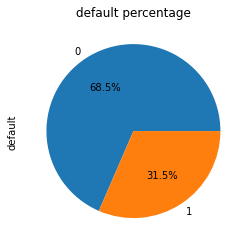

In [268]:
loan_ana['default'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%');
plt.title('default percentage')

> From the pie chart of loan excluding the current status, 68.5% were completed and 31.5% were default

In [269]:
loan_ana['borrowerrate'].describe()

count    48949.000000
mean         0.203111
std          0.082599
min          0.000000
25%          0.135500
50%          0.198000
75%          0.269900
max          0.360000
Name: borrowerrate, dtype: float64

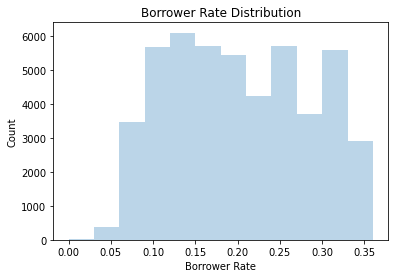

In [270]:
# univariate plots of column borrowerrate
base_color = sb.color_palette()[0]
bins = np.arange(0, loan_ana['borrowerrate'].max() + 0.01, 0.03);
plt.hist(data = loan_ana, x = 'borrowerrate', bins = bins, alpha = 0.3, color = base_color);
plt.title('Borrower Rate Distribution');
plt.xlabel('Borrower Rate');
plt.ylabel('Count');

> The borrower rate has 3 spikes, 2 at 0.25 and 0.31, the third spike being barely noticeable at 0.13 and most of the borrower rate lies between 0.07 and 0.30.

In [271]:
# univariate plots of prosperrating_(alpha)
prosperrating_cat = ['unknown', 'HR', 'E', 'D', 'C', 'B', 'A', 'AA']
loan_ana['prosperrating_(alpha)'] = pd.Categorical(loan_ana['prosperrating_(alpha)'], categories = prosperrating_cat, ordered = True)

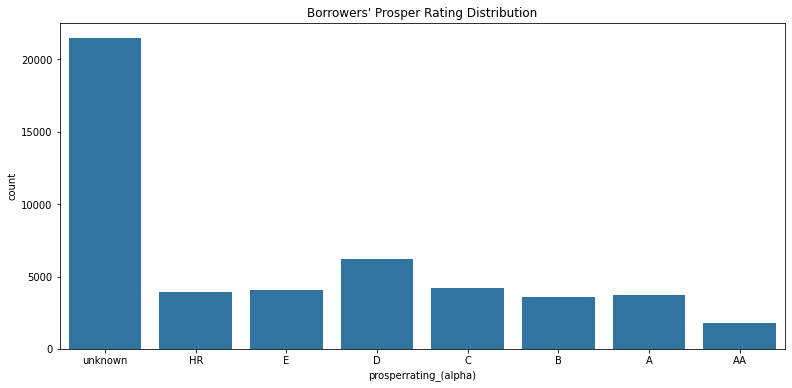

In [272]:
plt.subplots(figsize = (13, 6))
sb.countplot(data = loan_ana, x = 'prosperrating_(alpha)', color = base_color);
plt.title("Borrowers' Prosper Rating Distribution");

> There's a lot of data on the unknown row, this should be as a result of the inaccuracy of data from before July 2009. I will ignore that for now.

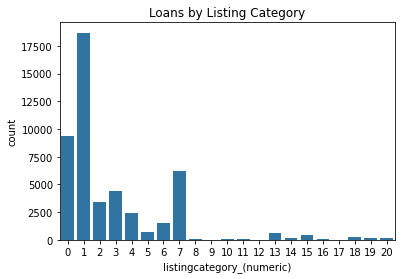

In [273]:
# univariate plots of listingcategory_(numeric)
sb.countplot(data = loan_ana, x = 'listingcategory_(numeric)', color = base_color);
plt.title('Loans by Listing Category');

> Certain categories have more loans, with the highest count on category 1

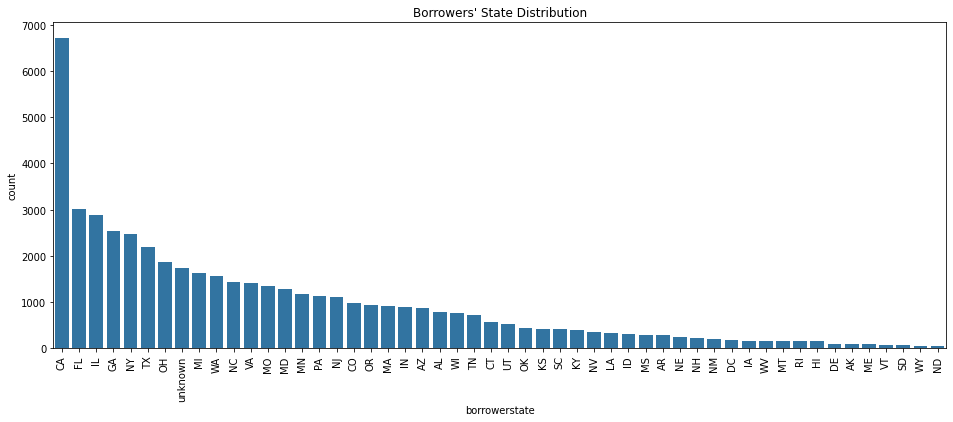

In [274]:
# Univariate plots of borrowerstate
state_order = loan_ana['borrowerstate'].value_counts().index
plt.subplots(figsize = (16, 6));
sb.countplot(data = loan_ana, x = 'borrowerstate', color = base_color, order = state_order);
plt.xticks(rotation = 90);
plt.title("Borrowers' State Distribution");

> The highest number of borrowers are from california as per the borrower's state distribution.

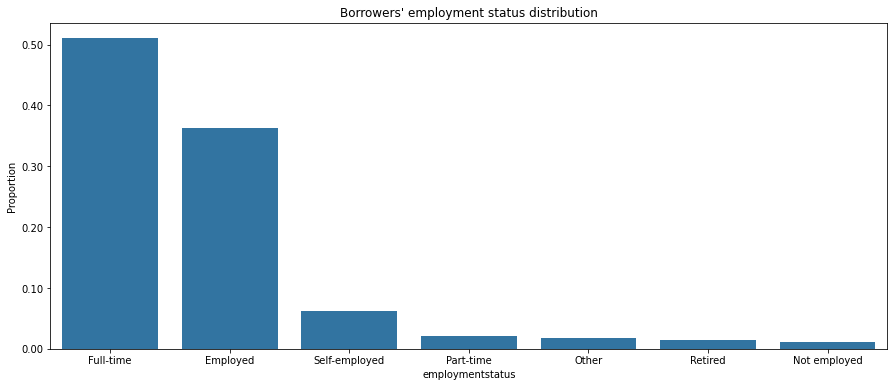

In [275]:
# Let's analyze the employmentstatus variable
type_counts = loan_ana['employmentstatus'].value_counts()
type_order = type_counts.index
n_emp = loan_ana['employmentstatus'].value_counts().sum()
max_type_count = type_counts[0]
max_propn = max_type_count / n_emp
tick_props = np.arange(0, max_propn, 0.1)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
plt.subplots(figsize = (15, 6))
base_color = sb.color_palette()[0]
sb.countplot(data = loan_ana, x = 'employmentstatus', color = base_color, order = type_order);
plt.yticks(tick_props * n_emp, tick_names);
plt.ylabel('Proportion');
plt.title("Borrowers' employment status distribution");

> From the chart, we deduce that most of the borrowers have jobs. A very small percentage of borrowers are either retired and unemployed, with the highest proportion of borrowers having full time jobs

In [276]:
# Check the values in incomerange
loan_ana['incomerange'].unique()

array(['$25,000-49,999', '$1-24,999', '$50,000-74,999', '$75,000-99,999',
       '$100,000+', 'Not employed', '$0', 'Not displayed'], dtype=object)

In [277]:
# univariate plots of incomerange 
income_classes = ['Not employed', 'Not displayed', '$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', '$75,000-99,999', '$100,000+']
loan_ana['incomerange'] = pd.Categorical(loan_ana['incomerange'], categories = income_classes, ordered = True)

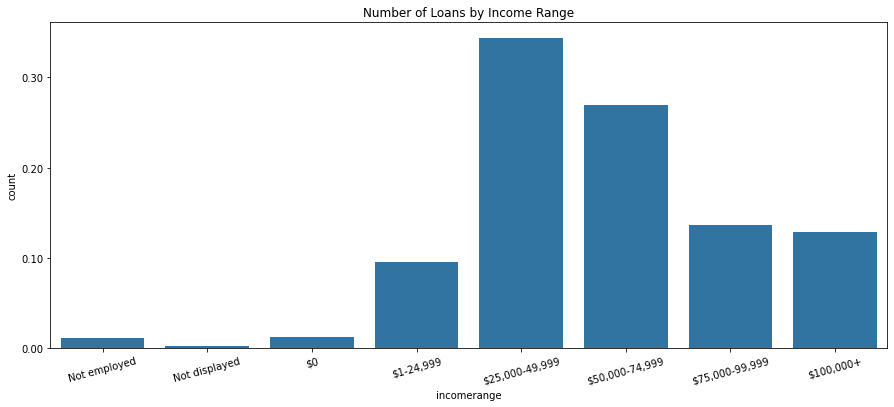

In [278]:
income_counts = loan_ana['incomerange'].value_counts()
n_income = loan_ana['incomerange'].value_counts().sum()
max_income_count = income_counts[0]
max_prop_income = max_income_count / n_income
tick_props = np.arange(0, max_prop_income, 0.1)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
plt.subplots(figsize = (15, 6))
base_color = sb.color_palette()[0]
sb.countplot(data = loan_ana, x = 'incomerange', color = base_color);
plt.yticks(tick_props * n_income, tick_names) 
plt.xticks(rotation = 15);
plt.title('Number of Loans by Income Range');

>The graph shows that the majority of debtors are wage earners (HAVE JOBS). This backs up the data in the chart. Also, we observe that the income bracket of\\$25,000 to \\$49,000 has the highest concentration of borrowers.

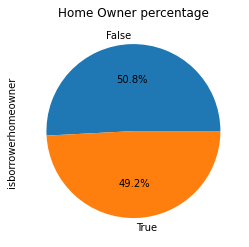

In [279]:
# Let's find out the percentage of borrowers who are home owners
loan_ana['isborrowerhomeowner'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%');
plt.title('Home Owner percentage');

> The proportion of borrowers who own homes vs those who don't varies by 50%:50%.

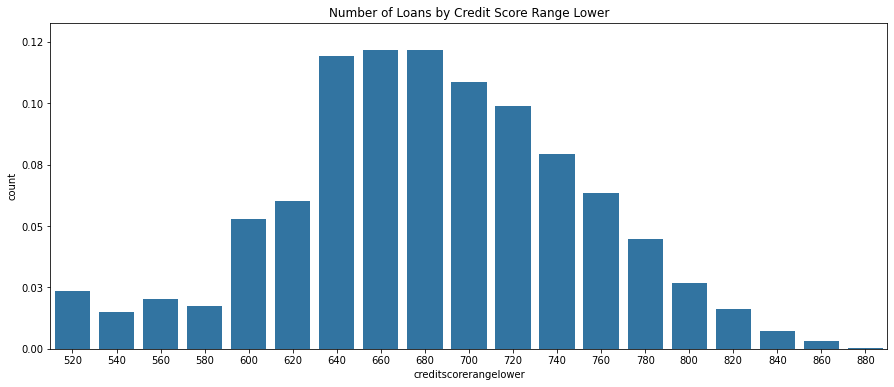

In [280]:
# Let's analyze the credit score
credit_counts = loan_ana['creditscorerangelower'].value_counts()
n_credit = loan_ana['creditscorerangelower'].value_counts().sum()
max_credit_count = income_counts[0]
max_prop_credit = max_credit_count / n_credit
tick_props = np.arange(0, max_prop_credit, 0.025)
tick_names = ['{:0.2f}'.format(v) for v in tick_props]
loan_ana['creditscorerangelower'] = loan_ana['creditscorerangelower'].apply(int)
plt.subplots(figsize = (15, 6))
sb.countplot(data = loan_ana, x = 'creditscorerangelower', color = base_color)
plt.yticks(tick_props * n_income, tick_names);
plt.title('Number of Loans by Credit Score Range Lower')
plt.ylim(0, 6500);

> Fewer borrowers have credit scores below 580, with the majority of credit scores falling between 640 - 720.

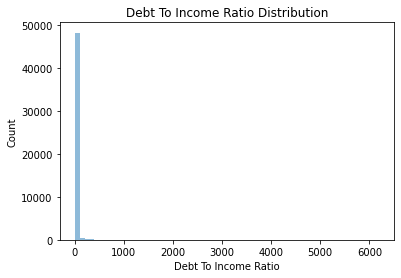

In [281]:
# univariate plots of debttoincomeratio
bins = np.arange(0, loan_ana['debttoincomeratio'].max() + 1, 100);
plt.hist(data = loan_ana, x = 'debttoincomeratio', bins = bins, alpha = 0.5);
plt.title('Debt To Income Ratio Distribution');
plt.xlabel('Debt To Income Ratio');
plt.ylabel('Count');

> Debt to Income Ratio Distribution is highly skewed, so I must change it using the log transformation approach.

In [282]:
loan_ana['debttoincomeratio'].describe()

count    48949.000000
mean         5.711041
std         57.857881
min          0.000000
25%          0.120000
50%          0.200000
75%          0.310000
max       6291.865167
Name: debttoincomeratio, dtype: float64

In [283]:
np.log10(loan_ana['debttoincomeratio'].describe())

count    4.689744
mean     0.756715
std      1.762363
min          -inf
25%     -0.920819
50%     -0.698970
75%     -0.508638
max      3.798779
Name: debttoincomeratio, dtype: float64

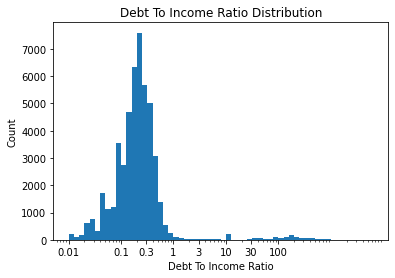

In [284]:
# Plot a chart with debttoincomeratio > 0 here.
bins = 10 ** np.arange(-2, 3.8 + 0.1, 0.1)
ticks = [0.01, 0.1, 0.3, 1, 3, 10, 30, 100]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = loan_ana, x = 'debttoincomeratio', bins = bins);
plt.xscale('log');
plt.xticks(ticks, labels);
plt.title('Debt To Income Ratio Distribution');
plt.xlabel('Debt To Income Ratio');
plt.ylabel('Count');

> Most of the borrowers have debt to income ratio in range (0, 1), some have the ratio even higher than 100.

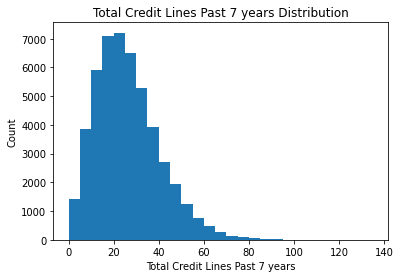

In [285]:
# univariate plots of totalcreditlinespast7years
bins = np.arange(0, loan_ana['totalcreditlinespast7years'].max() + 1, 5);
plt.hist(data = loan_ana, x = 'totalcreditlinespast7years', bins = bins);
plt.title('Total Credit Lines Past 7 years Distribution');
plt.xlabel('Total Credit Lines Past 7 years');
plt.ylabel('Count');

>Feels a little off, let's also perform some transformation.

In [286]:
np.log(loan_ana['totalcreditlinespast7years'].describe())

count    10.798534
mean      3.249056
std       2.658270
min       0.693147
25%       2.708050
50%       3.178054
75%       3.526361
max       4.912655
Name: totalcreditlinespast7years, dtype: float64

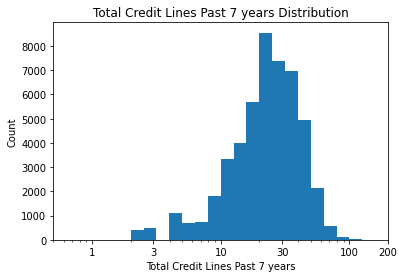

In [287]:
bins = 10 ** np.arange(0, 4.9 + 0.1, 0.1)
ticks = [1, 3, 10, 30, 100, 200]
labels = ['{}'.format(v) for v in ticks]
plt.hist(data = loan_ana, x = 'totalcreditlinespast7years', bins = bins);
plt.xscale('log');
plt.xticks(ticks, labels);
plt.xlim(0.5, 200);
plt.title('Total Credit Lines Past 7 years Distribution');
plt.xlabel('Total Credit Lines Past 7 years');
plt.ylabel('Count');

>The credit lines of many of the debtors range from 10 to 50.

<a id = 'bivariate'></a>
## Bivariate Exploration

>Investigating income and borrower rate will be our first step.


#### Is income correlated with borrower rate?

$25,000-49,999    16826
$50,000-74,999    13184
$75,000-99,999     6681
$100,000+          6299
$1-24,999          4668
$0                  607
Not employed        546
Not displayed       138
Name: incomerange, dtype: int64


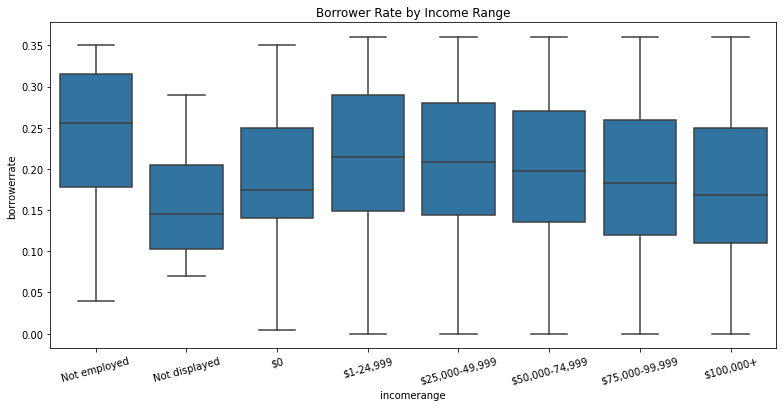

In [288]:
plt.subplots(figsize = (13, 6));
sb.boxplot(data = loan_ana, x = 'incomerange', y = 'borrowerrate', color = base_color);
plt.xticks(rotation = 15);
plt.title('Borrower Rate by Income Range');
print(income_counts)

> When income is greater than 1, we observe that as income ranges increase, the average borrower rate tends to decrease. Also, the unemployed group has a greater borrower rate than any other category, which is logical. But, as we can see today, Not listed & \\$0 categories have the lowest borrowerrate in comparison to other groups. Very likely because the sample size for "not displayed" is only 138 rows, which is quite little. Yet this doesn't explain why the borrowerrate for \\$0 is so low.

#### Is default correlated with borrowerrate?

Text(0.5, 1.0, 'Borrower Rate by Default State')

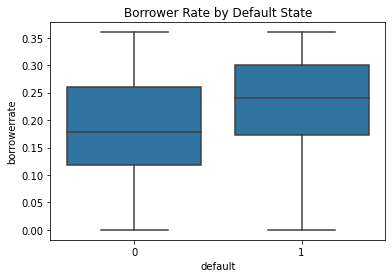

In [289]:
sb.boxplot(data = loan_ana, x = 'default', y = 'borrowerrate', color = base_color);
plt.title('Borrower Rate by Default State')

> What could be the reason why the borrowerrate appears to be higher in the default group?

#### Is credit score correlated with borrower rate?

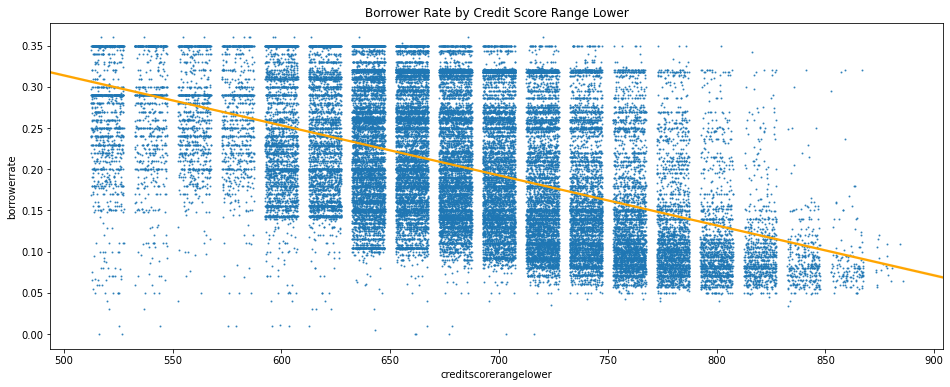

In [315]:
plt.figure(figsize = (16, 6))
sb.regplot(data = loan_ana, x = 'creditscorerangelower', y = 'borrowerrate', truncate = False, x_jitter = 7.5, scatter_kws={'s':1}, line_kws={'color':'orange'});
plt.xlabel('creditscorerangelower')
plt.ylabel('borrowerrate');
plt.title('Borrower Rate by Credit Score Range Lower');

> The borrowerrate and lower credit score ranges do appear to be related. These two variables have a bad association with one another.

#### Which income group has most defaults?

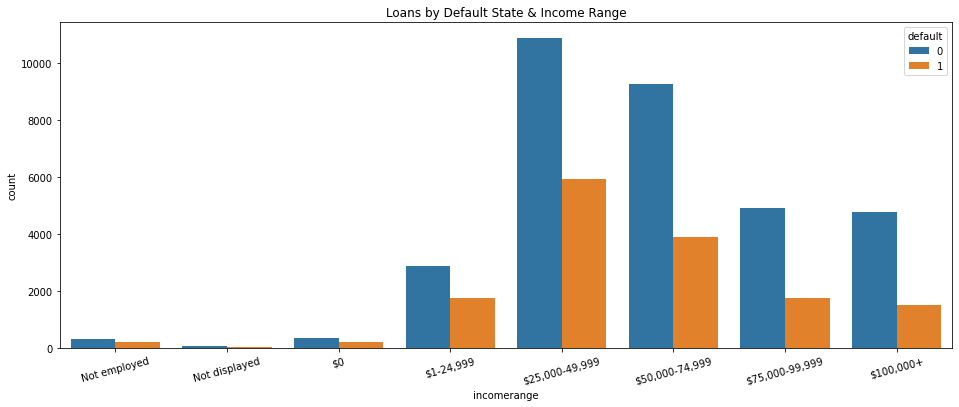

In [291]:
# Let's look at correlation between incomerange and default too.
plt.subplots(figsize = (16, 6))
sb.countplot(data = loan_ana, x = 'incomerange', hue = 'default');
plt.xticks(rotation = 15);
plt.title('Loans by Default State & Income Range');

> From the graph above, we can know that more defaulted loans came from the \\$25,000 - \\$49,999 range. But how about the default rate? Let's calculate the default rate of each income range.

#### Which income group has the highest default rate?

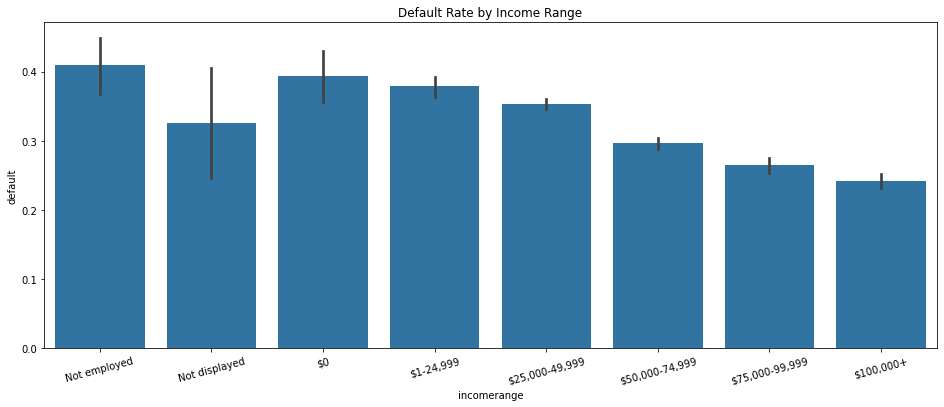

In [292]:
plt.figure(figsize = (16, 6))
sb.barplot(data = loan_ana, x = 'incomerange', y = 'default', color = base_color);
plt.xticks(rotation = 15);
plt.title('Default Rate by Income Range');

> `Not Employed` group and `$0` group have the greatest default rates, despite the fact that the groups "\\$25,000-\\$49,999" have the highest borrower rates, which makes more logical. Although having a lower borrowerrate than the \\$0 group, they are nonetheless more likely to miss loan payments. Yet, the typical default rate for the Not display category is less than \\$0 to \\$499,999.

#### Do certain loan categories have higher default rate?

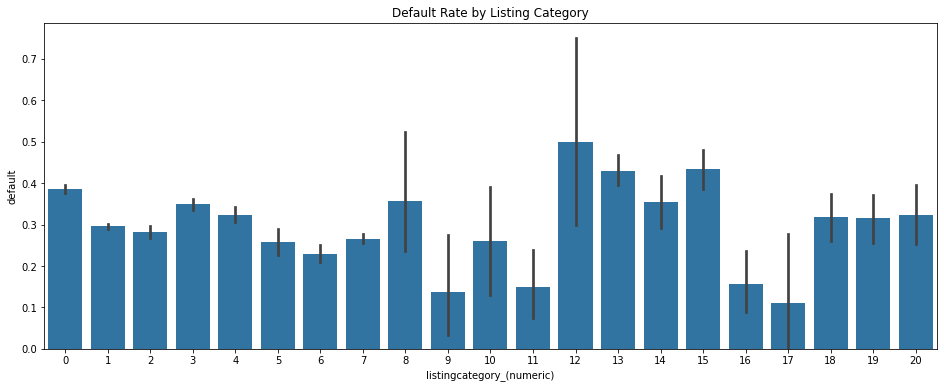

In [293]:
plt.subplots(figsize = (16, 6))
sb.barplot(data = loan_ana, x = 'listingcategory_(numeric)', y = 'default', color = base_color);
plt.title('Default Rate by Listing Category');

> Some type of loans do have a higher default rate averagely.

#### Is there any different between default rate across states?

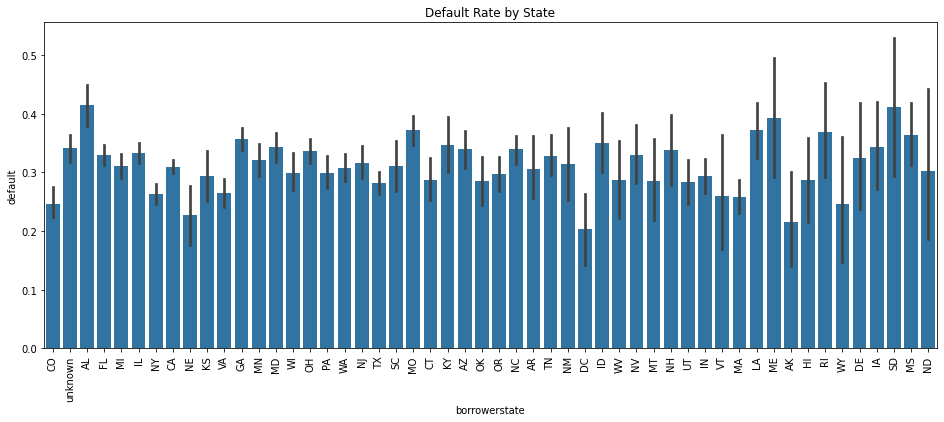

In [294]:
plt.subplots(figsize = (16, 6))
sb.barplot(data = loan_ana, x = 'borrowerstate', y = 'default', color = base_color);
plt.xticks(rotation = 90);
plt.title('Default Rate by State');

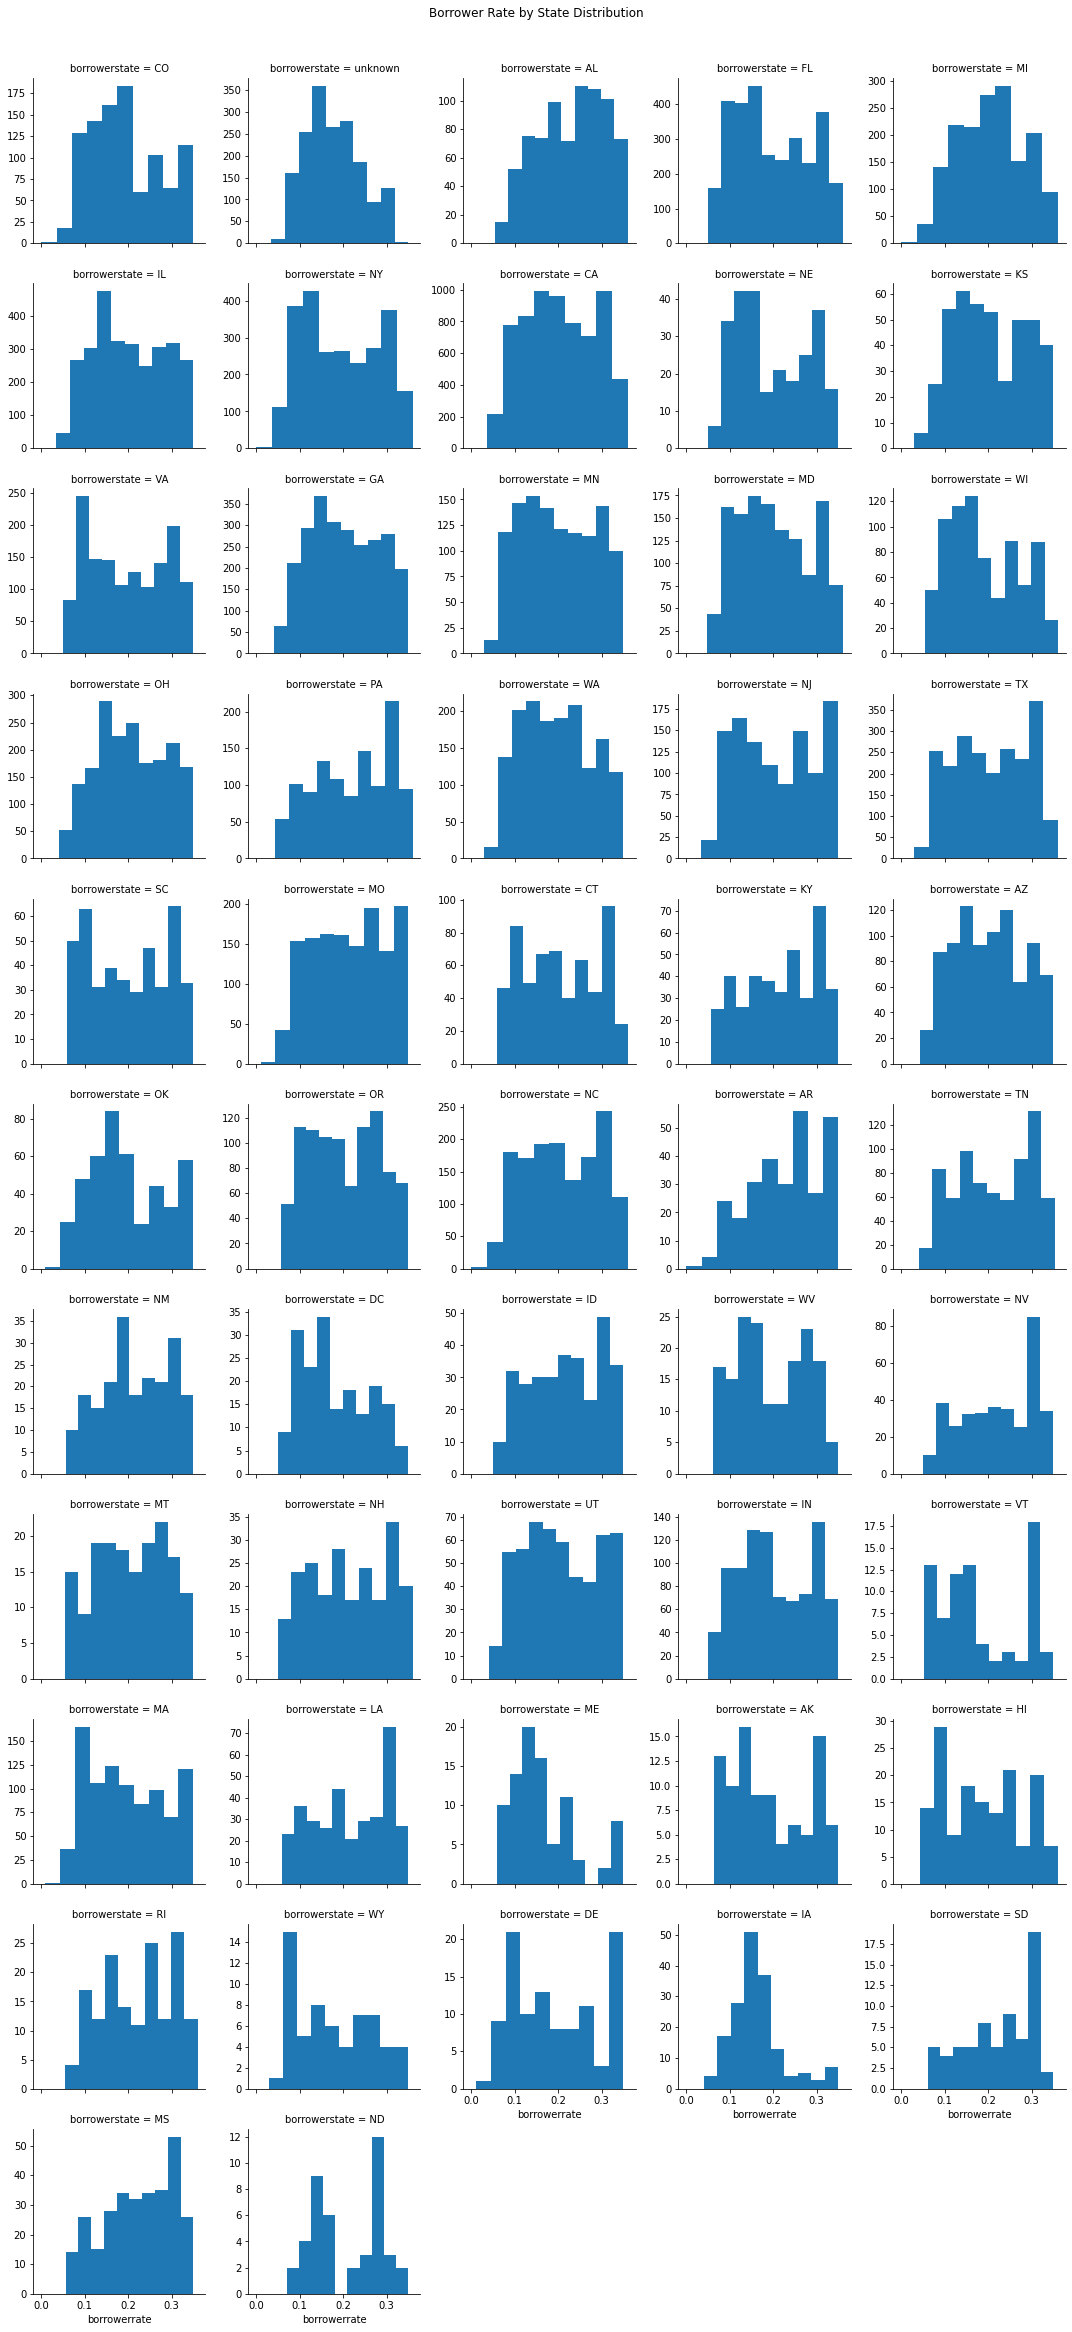

In [295]:
g = sb.FacetGrid(data = loan_ana, col = 'borrowerstate', col_wrap=5, sharey=False)
g.map(plt.hist, 'borrowerrate');
g.fig.subplots_adjust(top = 0.95);
g.fig.suptitle('Borrower Rate by State Distribution');

> We observe that there are significant differences between default rates across states.

#### Is there any correlation between homeowner and default rate?

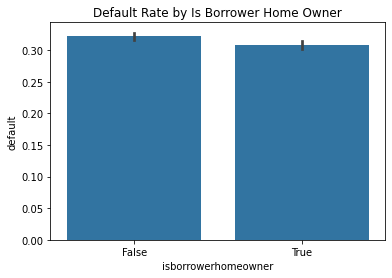

In [296]:
sb.barplot(data = loan_ana, x = 'isborrowerhomeowner', y = 'default', color = base_color);
plt.title('Default Rate by Is Borrower Home Owner');

> There is a very little difference between default rate and home owner

#### Is there a correlation between credit score lower range and default rate?

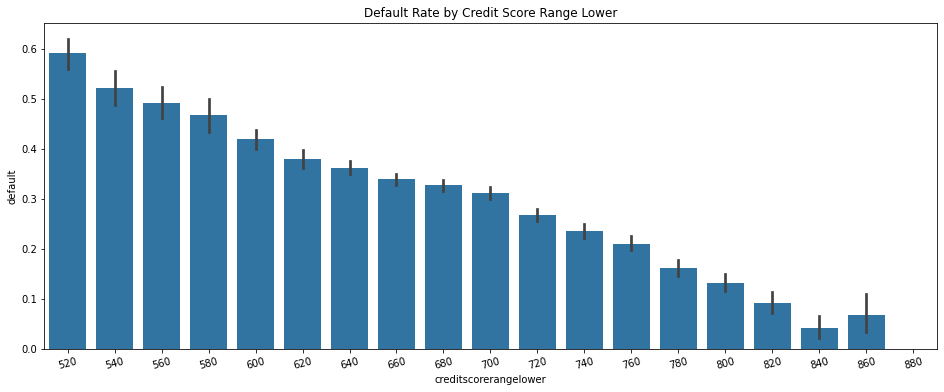

In [297]:
plt.subplots(figsize = (16, 6))
sb.barplot(data = loan_ana, x = 'creditscorerangelower', y = 'default', color = base_color);
plt.xticks(rotation = 15);
plt.title('Default Rate by Credit Score Range Lower');

The lower range of credit scores and default rate have a very significant negative link. There is an error at creditscorerangelower = 860, though

<a id = 'multivariate'></a>
## Multivariate Exploration

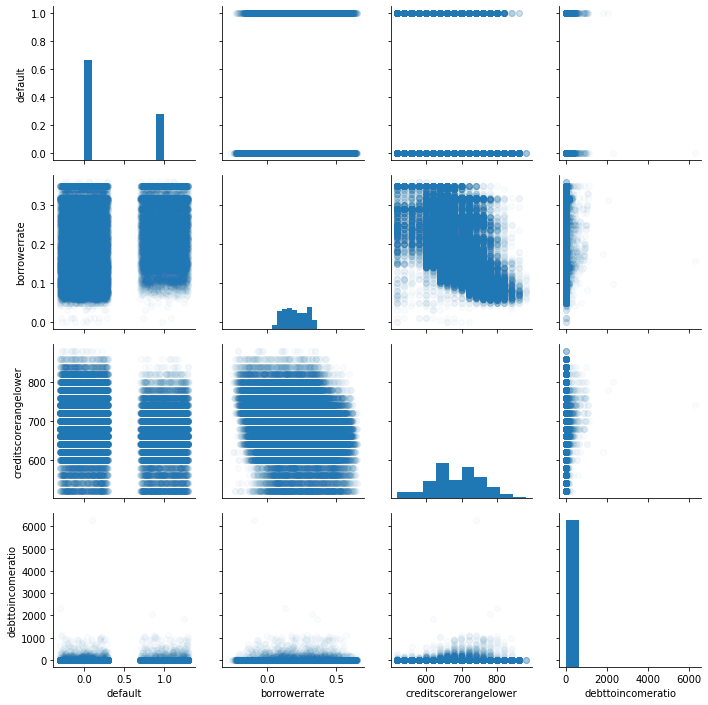

In [298]:
g = sb.PairGrid(data = loan_ana, vars = ['default', 'borrowerrate', 'creditscorerangelower', \
                                              'debttoincomeratio'])
g.map_diag(plt.hist)
g.map_offdiag(sb.regplot, truncate = False, x_jitter = 0.3, scatter_kws = {'alpha': 1/40}, fit_reg = False);

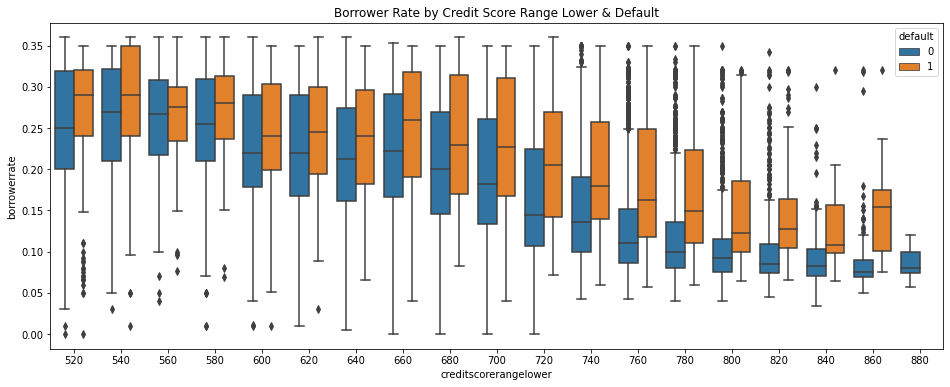

In [299]:
plt.figure(figsize = (16, 6))
sb.boxplot(data = loan_ana, x = 'creditscorerangelower', y = 'borrowerrate', hue = 'default');
plt.title('Borrower Rate by Credit Score Range Lower & Default');

> According to the graph, the borrower rate for the default group is more likely to be higher for each credit score.

Text(0.5, 0.98, 'Debt to Income Ratio by Default State by Credit Score Range Lower')

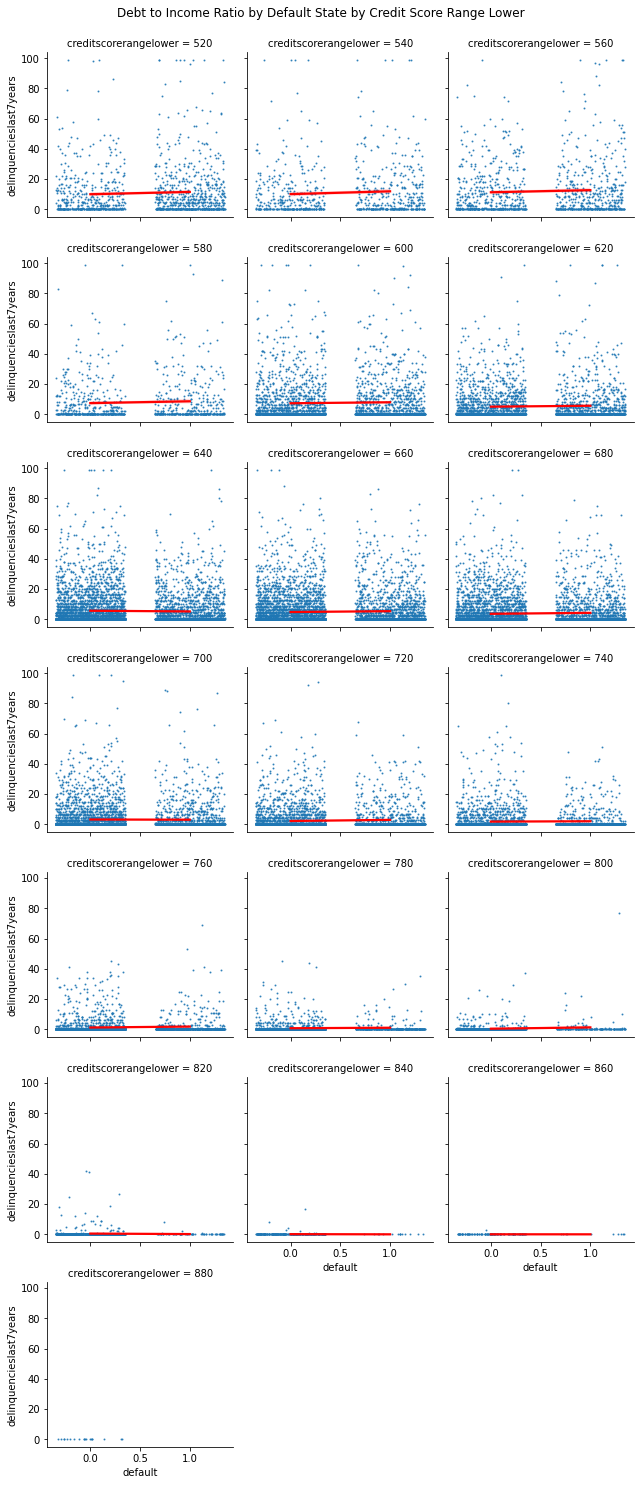

In [314]:
g = sb.FacetGrid(data=loan_ana, col='creditscorerangelower', col_wrap=3)
g.map(sb.regplot, 'default', 'delinquencieslast7years', x_jitter=0.35, scatter_kws={'s':1}, line_kws={'color':'red' })
g.fig.subplots_adjust(top=0.95)
g.fig.suptitle('Debt to Income Ratio by Default State by Credit Score Range Lower')


>Regarding delinquencies over the last 7 years, there isn't much of a difference between these two groups.

Text(0.5, 0.98, 'Debt to Income Ratio by Income Group by State (Not Employed)')

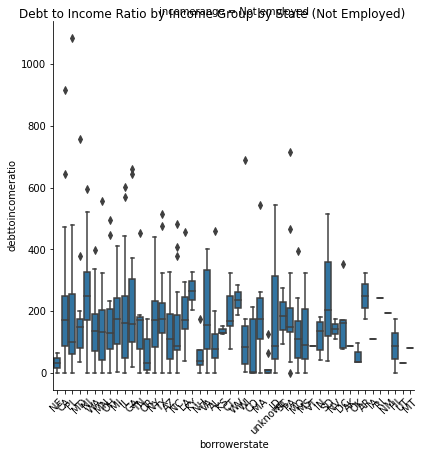

In [301]:
# Group Not Employed

no_salary = loan_ana.loc[loan_ana['incomerange'].isin(['Not employed']), ['incomerange', 'borrowerstate', 'debttoincomeratio']]
no_salary['incomerange'] = no_salary['incomerange'].astype(str)
g = sb.FacetGrid(data=no_salary, col='incomerange', col_wrap=1, height=6, sharey=False, margin_titles=True)
g.map(sb.boxplot, 'borrowerstate', 'debttoincomeratio')
plt.xticks(rotation=45)
g.fig.subplots_adjust(top=0.95)
g.fig.suptitle('Debt to Income Ratio by Income Group by State (Not Employed)')

Text(0.5, 0.98, 'Debt to Income Ratio by Income Group by State ($0)')

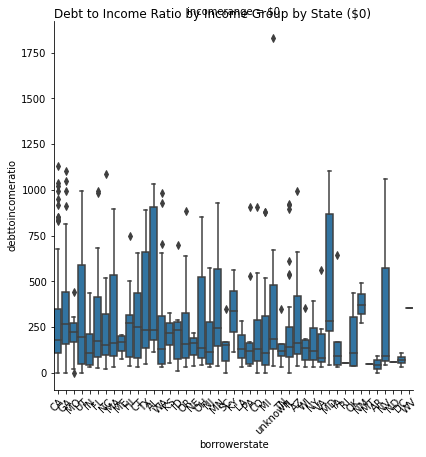

In [302]:
# Group Not $0
no_salary = loan_ana.loc[loan_ana['incomerange'].isin(['$0']), ['incomerange', 'borrowerstate', 'debttoincomeratio']]
no_salary['incomerange'] = no_salary['incomerange'].astype(str)
g = sb.FacetGrid(data=no_salary, col='incomerange', col_wrap=1, height=6, sharey=False, margin_titles=True)
g.map(sb.boxplot, 'borrowerstate', 'debttoincomeratio')
plt.xticks(rotation=45)
g.fig.subplots_adjust(top=0.95)
g.fig.suptitle('Debt to Income Ratio by Income Group by State ($0)')

> According to the data graph above, the income categories *Not Employed* and *$0*  have substantially greater debt-to-income ratios than other income groups generally.  *Not Employed*, *$0*, and *Not displayed* also have far more varying debt-to-income rates among states..

<a id = 'conclusion'></a>
## Conclusion

After examining the relationships between **Default** and a few other relevant variables using univariate, bivariate, and multivariate analyses, I discovered that loan defaults are related to a number of variables, including the *borrower rate*, *income range*, *credit score*, *state*, and *debt-to-income ratio*.